Here we have imported the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

generating synthetic data using np.random for the k values

In [ ]:
np.random.seed(0)
s = np.random.choice(1,21)

defining mean and covariance matrices for each cluster

In [ ]:
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]
mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]
mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

generating random data using samples from every distribution

In [ ]:
data1 = np.random.multivariate_normal(mu1, sigma1, 100)

data2 = np.random.multivariate_normal(mu2, sigma2, 100)

data3 = np.random.multivariate_normal(mu3, sigma3, 100)

data4 = np.random.multivariate_normal(mu4, sigma4, 100)

synthetic_data = np.vstack([data1, data2, data3, data4])

printing the shape of the matrix

In [ ]:
print(synthetic_data.shape)

(400, 2)


Plotting the generated data

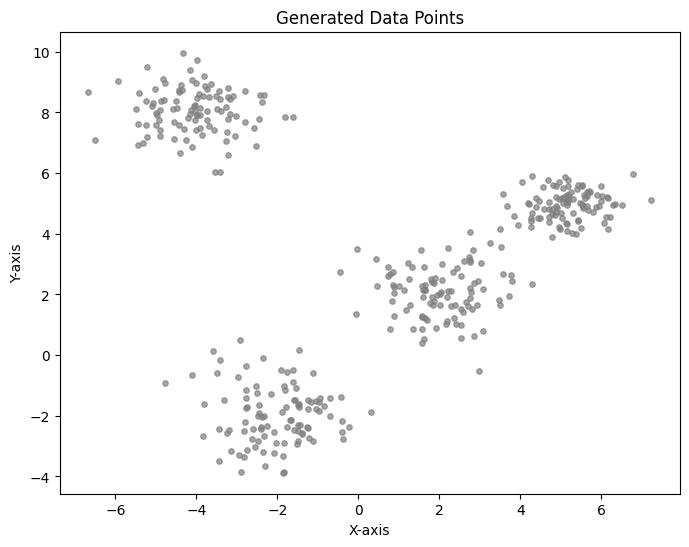

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=15, color='gray', alpha=0.7)
plt.title("Generated Data Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

Finding the within cluster sum of squares and storing them in an empty list

In [ ]:
l_wcss = []
for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(synthetic_data)
  l_wcss.append(kmeans.inertia_)

performing K means clustering

In [ ]:
optimal_k = 4  # Determined from the Elbow Method
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans_optimal.fit_predict(synthetic_data)

Original Data plot

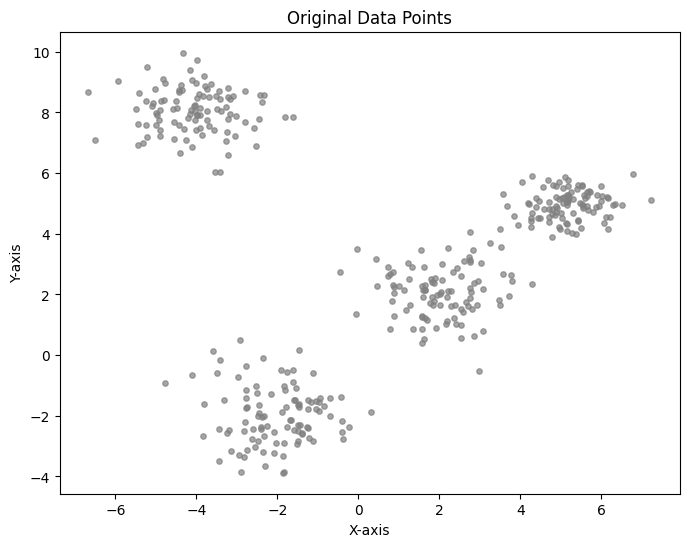

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=15, color='gray', alpha=0.7)
plt.title("Original Data Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

Elbow method plotting

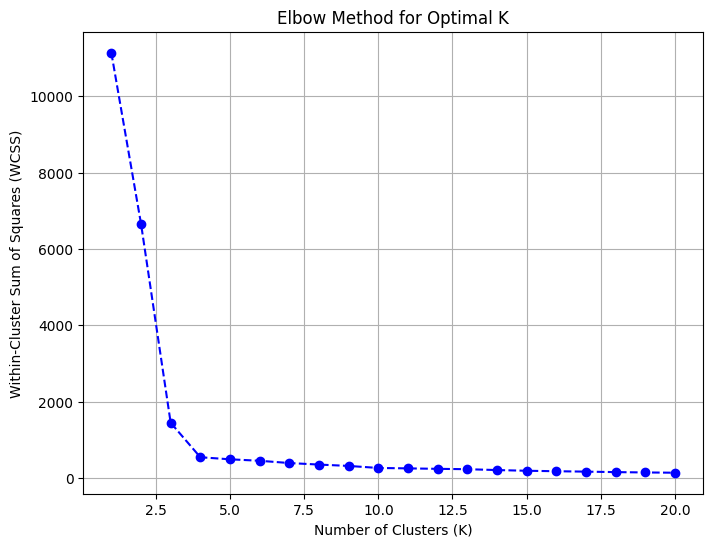

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), l_wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()
plt.show()

Cluster method plotting

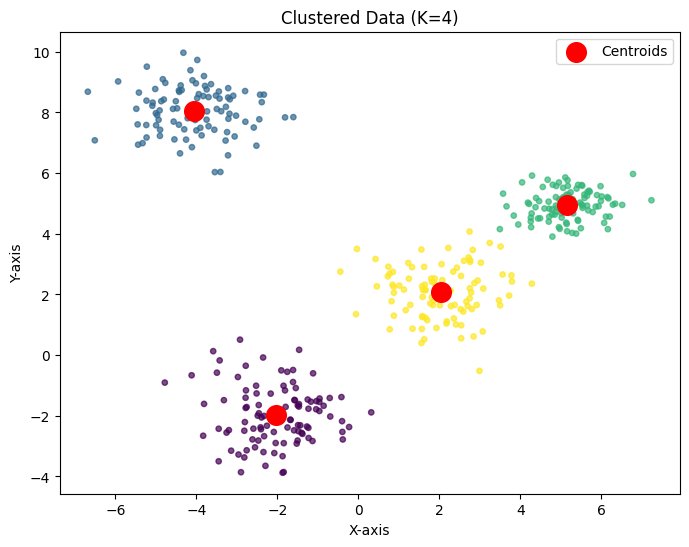

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=clusters, s=15, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids')
plt.title(f"Clustered Data (K={optimal_k})")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

Q1: What might happen if the value of the number of clusters is set too high or
too low in K-Means?

  -> If the number of clusters is too high, it may lead to overfitting and can cause an inaccurate result. It would also lead to the loss of important patterns within the data.

  If the number of assigned clusters is too small then the model that is formed will be too general and any sepcific or accurate response will not be observed due to the lack of clusters. It can also fail to capture certain distinctions within the data.

Q2: What is the effect of initializing centroids far apart or too close together in
K-Means, and how might this affect the final clustering?

-> If the centroids are too far apart, they may lead to ineffective or incorrect clustering. The number of members of the cluster may be too less.

If the centroids are too close together, then this could lead to poor convergence and it could start clustering points togeher even though they are not distinct groups in the data, further causing underfitting.

Q3: How might you optimise the centroid initialisation to lead to better
clustering?

-> Kmeans++ is a method we can use, where we use the initial centroids more strategically. Moreover, we could use algorithms like GMM or DBscan which are more computtionally complex and heavy, but provide accurate results while addressing the disadvantages of using Kmeans, such as clustering for complex shapes/patterns formed by plotting the data.


Q4: Why might the Elbow Method not always provide a clear solution for
choosing the optimal number of clusters?

-> The elbow method sometimes does not provide us with accurate and clear solutions for choosing the optimal number of clusters as sometimes the curve for certain datasets may not have a defined elbow which makes it difficult to choose the correct number of clusters.

Moreover, some datasets may exhibit multiple points that could be interpreted as multiple elbows and this leads to ambiguity.

Q5: How can WCSS be influenced by the presence of outliers or noise in the
data?

-> WCSS can be significantly affected by outliers and noise. Outliers may increase the distance between data points and their assigned centroids which may increase WCSS value.

Noise may cause the Kmeans algorithm to create smaller clusters around these outliers which may increase the overall WCSS as the model tries to minimize variance. This distorts the true clustering and reduces model effectiveness.